In [ ]:

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import os
import cv2
import matplotlib.image as mp

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
with open('/content/drive/My Drive/Main/train.mn.txt') as file:
    mal_txt = file.read().split('\n')
with open('/content/drive/My Drive/Main/train.en.txt') as file:
    eng_txt = file.read().split('\n')
with open('/content/drive/My Drive/Main/train_images.txt') as file:
    train_images = file.read().split('\n')


In [ ]:
train_images.pop(0)
mal_txt.pop(0)
eng_txt.pop(0)

'Male surfer surfing in still in the ocean'

In [ ]:
train_images=train_images[20001:]

In [ ]:
img_path=[]
for s in train_images:
    img_path.append("/content/drive/My Drive/Main/trainimages/train/"+s)

In [ ]:
len(train_images)

8931

In [ ]:
len(img_path)

10000

/content/drive/My Drive/Main/trainimages/train/2382885.jpg
mal:ഭക്ഷണം നോക്കുന്ന ഇന്ത്യൻ മനുഷ്യൻ
eng:Indian man looking at food						


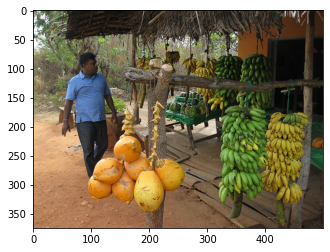

In [ ]:
im=mp.imread(img_path[0])
plt.imshow(im)
print(img_path[0])
print("mal:"+mal_txt[20001])
print("eng:"+eng_txt[20001])

In [ ]:
import pandas as pd
df = pd.read_csv ('/content/drive/My Drive/Main/crop1.csv')
print(df)

         X    Y    W    H
0       45   30  545  436
1      306  239  189   94
2      664  241   93  126
3        1  113  120  138
4      105  178  148  209
...    ...  ...  ...  ...
28925   63   90  363  335
28926   47   81  282  393
28927  331   71  117   57
28928  273   34  211  165
28929  348  156   12   12

[28930 rows x 4 columns]


In [ ]:
#Xi=df['X'].values[0]
#print(type(Xi))

<class 'numpy.int64'>


In [ ]:
'''
for i in range(len(dfnew)):
    temp=mp.imread(img_path[i])
    cropped_image = im[Y:Y+H, X:X+W]
print([X,Y,W,H])
plt.imshow(cropped_image)
#cv2.imwrite('contour1.png', cropped_image)
'''

In [ ]:
pip install keras-applications

     |████████████████████████████████| 50 kB 4.2 MB/s 


In [ ]:
import pandas as pd
import pickle
import numpy as np
import os
import keras
import tensorflow
from keras_applications.resnet import ResNet50
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, GlobalAveragePooling2D,BatchNormalization,Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model
from keras.utils import np_utils
import random
from keras.preprocessing import image, sequence
import matplotlib.pyplot as plt
import keras
from keras import backend as K 
import gensim
from numpy import *
import numpy as np
import pandas as pd 
import re
from tensorflow.keras.applications.vgg16 import VGG16
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed,Conv2D,MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings

In [ ]:
#Loading VGG model for Feature Extraction-Removing classification layers from memory
modelvgg = VGG16(include_top=True,weights="imagenet")
modelvgg.layers.pop()
modelvgg = Model(inputs=modelvgg.inputs, outputs=modelvgg.layers[-2].output)
modelvgg.summary()

553476096/553467096 [==============================] - 6s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
tf.keras.utils.plot_model(
    modelvgg,
    to_file='model.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB'
)

NameError: ignored

In [ ]:
dfnew=df[20001:]

In [ ]:
len(dfnew)

8929

In [ ]:
dfnew

,X,Y,W,H
20001,71,122,235,340
20002,0,253,130,53
20003,83,40,364,290
20004,197,123,90,75
20005,98,131,163,185
...,...,...,...,...
28925,63,90,363,335
28926,47,81,282,393
28927,331,71,117,57
28928,273,34,211,165


In [ ]:
import cv2

In [ ]:
img_path[1]

'/content/drive/My Drive/Main/trainimages/train/2382891.jpg'

In [ ]:
splits=len(dfnew)
dfnew=df[20001:]
imagedata=np.zeros(shape=(splits,224,224,3))
for i in range(splits):
    temp=mp.imread(img_path[i])
    X=dfnew['X'].values[i]
    Y=dfnew['Y'].values[i]
    W=dfnew['W'].values[i]
    H=dfnew['H'].values[i]
    temp = temp[Y:Y+H, X:X+W]
    if (len(temp.shape)==3):
      try:
         temp=cv2.resize(temp,(224,224))
         imagedata[i]=temp
      except:
        break
    elif (len(temp.shape)<3):
       #plt.imshow(temp)
       temp=cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
       temp=cv2.resize(temp,(224,224))
       imagedata[i]=temp    
imagedata=imagedata/255
imagedata=imagedata.astype(np.float16)

In [ ]:
imagedata[1]

array([[[0.3333, 0.3843, 0.204 ],
        [0.3333, 0.3843, 0.2118],
        [0.341 , 0.3882, 0.2313],
        ...,
        [0.2864, 0.341 , 0.2432],
        [0.4236, 0.4707, 0.4158],
        [0.51  , 0.5527, 0.5293]],

       [[0.3333, 0.3843, 0.204 ],
        [0.3372, 0.3843, 0.2118],
        [0.341 , 0.3882, 0.2313],
        ...,
        [0.2864, 0.341 , 0.2432],
        [0.4236, 0.4707, 0.4158],
        [0.51  , 0.5527, 0.5293]],

       [[0.3333, 0.3882, 0.2079],
        [0.3372, 0.3882, 0.2157],
        [0.341 , 0.392 , 0.2313],
        ...,
        [0.2903, 0.3452, 0.2471],
        [0.4197, 0.4666, 0.4158],
        [0.502 , 0.545 , 0.5254]],

       ...,

       [[0.541 , 0.506 , 0.2783],
        [0.537 , 0.502 , 0.2744],
        [0.533 , 0.4941, 0.2666],
        ...,
        [0.1255, 0.1451, 0.1686],
        [0.1177, 0.1372, 0.1569],
        [0.1137, 0.1333, 0.149 ]],

       [[0.5527, 0.5137, 0.2825],
        [0.549 , 0.51  , 0.2783],
        [0.541 , 0.502 , 0.2705],
        .

/content/drive/My Drive/Main/trainimages/train/2382885.jpg
mal:ഭക്ഷണം നോക്കുന്ന ഇന്ത്യൻ മനുഷ്യൻ
eng:Indian man looking at food						


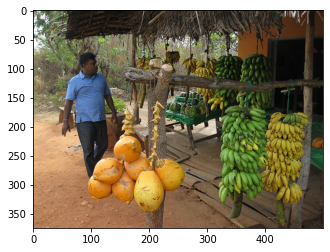

In [ ]:
im=mp.imread(img_path[0])
plt.imshow(im)
print(img_path[0])
print("mal:"+mal_txt[20001])
print("eng:"+eng_txt[20001])

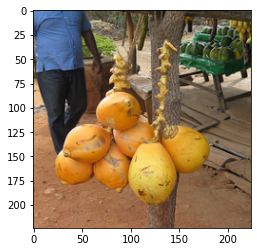

In [ ]:
plt.imshow(imagedata[0].astype(np.float32))


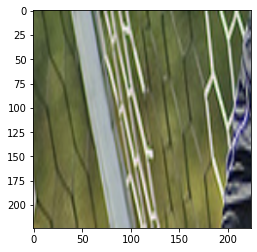

In [ ]:
plt.imshow(imagedata[1].astype(np.float32))

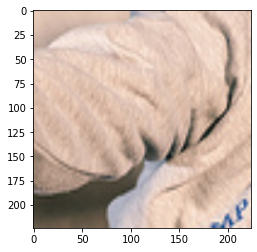

In [ ]:
plt.imshow(imagedata[3].astype(np.float32))

/content/drive/My Drive/Main/trainimages/train/2382891.jpg
mal:ഹൂഡിയുള്ള പയ്യൻ
eng:Boy with hoodie						


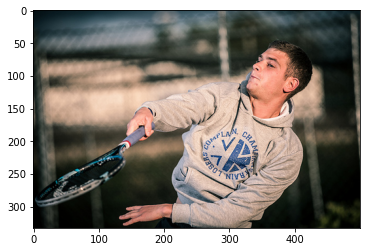

In [ ]:
im=mp.imread(img_path[3])
plt.imshow(im)
print(img_path[1])
print("mal:"+mal_txt[20004])
print("eng:"+eng_txt[20004])

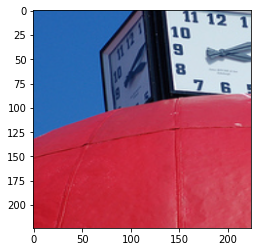

In [ ]:
plt.imshow(imagedata[4].astype(np.float32))

/content/drive/My Drive/Main/trainimages/train/2382901.jpg
mal:ക്ലോക്ക് മുഖം വെളുത്തതാണ്
eng:clock face is white						


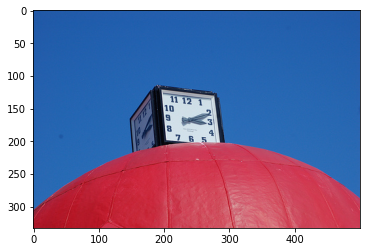

In [ ]:
im=mp.imread(img_path[4])
plt.imshow(im)
print(img_path[4])
print("mal:"+mal_txt[20005])
print("eng:"+eng_txt[20005])

/content/drive/My Drive/Main/trainimages/train/2382891.jpg
mal:ഒരു പുല്ലിന്റെ ഭാഗം
eng:part of a grass						


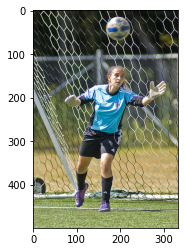

In [ ]:
im=mp.imread(img_path[1])
plt.imshow(im)
print(img_path[1])
print("mal:"+mal_txt[10002])
print("eng:"+eng_txt[10002])

In [ ]:
with open('/content/drive/My Drive/Main/imagedatas1.txt', 'w') as writefile:
    writefile.write("imagedata")

In [ ]:
#preprocessing images
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
from collections import OrderedDict
jpgs=img_path[:splits]
images_new = OrderedDict()
npix = 224
target_size = (npix,npix,3)
for i,name in enumerate(jpgs): 
    filename = name
    image = load_img(filename, target_size=target_size)
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    nimage = preprocess_input(image)
    y_pred = modelvgg.predict(nimage.reshape( (1,) + nimage.shape[:3]))
    images_new [name] = y_pred.flatten()
    if i%200==0:
        print(i,filename)

0 /content/drive/My Drive/Main/trainimages/train/2382885.jpg
200 /content/drive/My Drive/Main/trainimages/train/2383585.jpg
400 /content/drive/My Drive/Main/trainimages/train/2384378.jpg
600 /content/drive/My Drive/Main/trainimages/train/2385161.jpg
800 /content/drive/My Drive/Main/trainimages/train/2385910.jpg
1000 /content/drive/My Drive/Main/trainimages/train/2386586.jpg
1200 /content/drive/My Drive/Main/trainimages/train/2387362.jpg
1400 /content/drive/My Drive/Main/trainimages/train/2388141.jpg
1600 /content/drive/My Drive/Main/trainimages/train/2388942.jpg
1800 /content/drive/My Drive/Main/trainimages/train/2389714.jpg
2000 /content/drive/My Drive/Main/trainimages/train/2390455.jpg
2200 /content/drive/My Drive/Main/trainimages/train/2391370.jpg
2400 /content/drive/My Drive/Main/trainimages/train/2392128.jpg
2600 /content/drive/My Drive/Main/trainimages/train/2392898.jpg
2800 /content/drive/My Drive/Main/trainimages/train/2393739.jpg
3000 /content/drive/My Drive/Main/trainimages/t

In [ ]:
vgg_feature=np.zeros(shape=(len(jpgs),4096))
for i in range(len(jpgs)):
    vgg_feature[i]=images_new[jpgs[i]]

In [ ]:
save('/content/drive2/My Drive/Mainvgg_feature3.npy', vgg_feature)

'vgg_feature)' was not found in history, as a file, url, nor in the user namespace.


In [ ]:
save('/content/drive/My Drive/trimagedata3.npy', imagedata)

In [ ]:
a=np.load('/content/drive/My Drive/Main/vgg_feature1.npy')

In [ ]:
b=np.load('/content/drive/My Drive/Main/vgg_feature2.npy')

In [ ]:
import numpy as np

In [ ]:
c= np.concatenate((a,b), axis = 0)

In [ ]:
e=np.load('/content/drive/My Drive/Main/vgg_feature3.npy')

In [ ]:
combined=np.concatenate((c,e), axis = 0)

In [ ]:
h=combined

In [ ]:
combined[0]

array([0.63245344, 1.38566077, 0.        , ..., 0.        , 0.        ,
       2.18226457])

In [ ]:
len(combined)

28929

In [ ]:
save('/content/drive/My Drive/Main/data.npy',combined)

'' was not found in history, as a file, url, nor in the user namespace.


In [ ]:
save('/content/drive/My Drive/Main/combineddata.npy', combined)

'combined)' was not found in history, as a file, url, nor in the user namespace.


In [ ]:
f=np.load('/content/drive/My Drive/trimagedata1.npy')

In [ ]:
g==np.load('/content/drive/My Drive/trimagedata2.npy')

In [ ]:
g==np.load('/content/drive/My Drive/trimagedata3.npy')